<a href="https://colab.research.google.com/github/richybu/gis_code/blob/main/assessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Front Matter: CASA0013: Foundations of Spatial Data Science

## Title of Briefing

### Student ID

### Word Count:

In [ ]:
# This code was made on google colab as docker would not work on my computer. This was discussed with Dave and he said 
# this would be taken into account when run and marked if there were any issues. 

In [1]:
# import packages:

import os
import numpy as np
import pandas as pd
!pip install geopandas            # use as working in google colab
import geopandas as gpd
import geopandas as gpd   
import matplotlib.cm as cm
import matplotlib.pyplot as plt
!pip install mapclassify          # use as working in google colab
import mapclassify as mc
!pip install legendgram          # use as working in google colab
import legendgram
!pip install pysal          # use as working in google colab
import pysal as p
import palettable.matplotlib as palmpl

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 45.2 MB/s 
     |████████████████████████████████| 6.3 MB 51.3 MB/s 
     |████████████████████████████████| 2.4 MB 6.7 MB/s 
     |████████████████████████████████| 95 kB 3.0 MB/s 
     |████████████████████████████████| 60 kB 4.7 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 164 kB 55.6 MB/s 
     |████████████████████████████████| 46 kB 2.5 MB/s 
     |████████████████████████████████| 41 kB 452 kB/s 
     |████████████████████████████████| 209 kB 57.6 MB/s 
     |████████████████████████████████| 5.7 MB 51.8 MB/s 
     |████████████████████████████████| 81 kB 7.1 MB/s 
     |████████████████████████████████| 138 kB 56.3 MB/s 
     |████████████████████████████████| 226 kB 60.8 MB/s 
     |████████████████████████████████| 269 kB 51.4 MB/s 
     |████████████████████████████████| 66.6 MB 99 kB/s 
     |██████████████████████

In [2]:
import os 
from requests import get
from urllib.parse import urlparse

# download and cache file locally:

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.

    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL   # src is the source url we get the data from? 
    fn  = os.path.split(url.path)[-1] # Extract the filename as filename is the last item in te list i.e. -1
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")
        
        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
        
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [3]:
# we will need the boundaries of the london boroughs. It would also be helpful to see areas of water and park on our final map to make it easier to read,
# and also to make it clear why these areas do not have any listings.

ddir  = os.path.join('data','geo') # destination directory (in case it is not found this directory is created)
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )         # each line makes a geopackage
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )

print('Done.')

data/geo/Boroughs.gpkg not found, downloading!
	Done downloading...
data/geo/Water.gpkg not found, downloading!
	Done downloading...
data/geo/Greenspace.gpkg not found, downloading!
	Done downloading...
Done.


In [4]:
# check each is a geopackage dataframe
for gpkg in [boros,water,green]:
    print(isinstance(gpkg, gpd.GeoDataFrame))

True
True
True


In [5]:
# check the crs of each
for gpkg in [boros,water,green]:
    print(gpkg.crs)

epsg:27700
epsg:27700
epsg:27700


In [6]:
# This will work well for our data - its a common CRS for analysing GB data

In [7]:
# print each to view/check them:

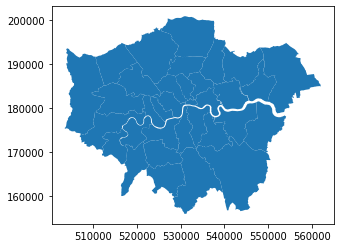

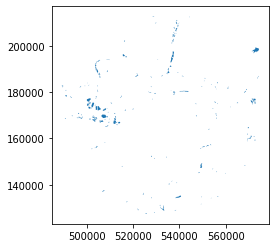

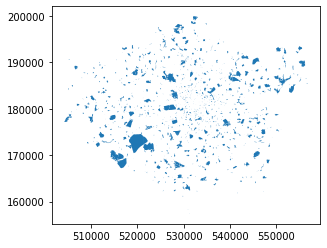

In [8]:
for gpkg in [boros,water,green]:    # a for loop to do a plot of each geopackage
    gpkg.plot()

FileNotFoundError: ignored

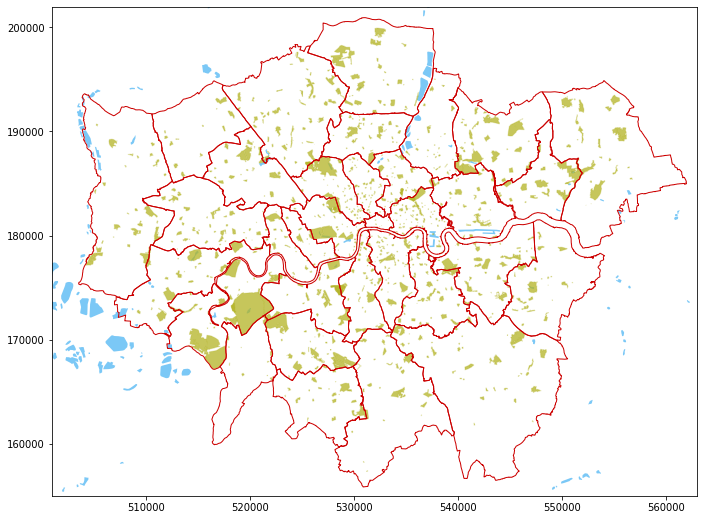

In [9]:
# Plot all three to the same axes and set colours to help show what the areas/lines are:
fig, ax = plt.subplots(1,1, figsize=(12,9))

water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)                         # setting their axis to ax puts them on top of one another
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14, 0.75), ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 1), facecolor='none', linewidth=1, ax=ax)

# Set the limits of the maps:
ax.set_xlim(501000,563000)            # the numbers are the easting and northing values i.e. metres from the equator. 
ax.set_ylim(155000,202000)

plt.savefig(os.path.join('img','Map-First_Pass.png'))       # saves the figure to img/Map-First_Pass.png

In [10]:

# now lets look at our listings data
# this uses the London 10 October, 2021 listings.csv.gz file showing the 'Summary information and metrics for listings in London (good for visualisations).' available at http://insideairbnb.com/get-the-data.html

ddir  = os.path.join('data','raw') # destination directory                     
spath = 'https://github.com/richybu/fsds/' # source path

# pdf is pandas dataframe
pdf = pd.read_csv( cache_data(spath+'listings5.csv?raw=true', ddir),
    low_memory=False)



data/raw/listings5.csv not found, downloading!
	Done downloading...


In [11]:
# free up some memory
del(pdf)

In [15]:
# set the columns we want and load the airbnb data
cols = ['id','latitude','longitude', 'host_total_listings_count', 'host_id']
ddir  = os.path.join('data','raw')                     
spath = 'https://raw.githubusercontent.com/richybu/fsds/master/listings5.csv' 
pdf  = pd.read_csv( cache_data(spath, ddir),
        low_memory=False, usecols=cols)

# view the number of rows and data type for each column
print(f"pdf now contains {pdf.shape[0]} rows.")
pdf.info()

Found data/raw/listings5.csv locally!
pdf now contains 67903 rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67903 entries, 0 to 67902
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         67903 non-null  int64  
 1   host_id                    67903 non-null  int64  
 2   host_total_listings_count  67871 non-null  float64
 3   latitude                   67903 non-null  float64
 4   longitude                  67903 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.6 MB


In [ ]:
# host_total_listings_count, latitude, and longitude are the correct datatypes for what were going to do with them

In [16]:
# drop the rows that have a value of '0' in the 'host_total_listings_count' column
# drop the rows that have a value of '1' as we only want to show listings whose host has other listings

pdf = pdf[pdf.host_total_listings_count != 0]
pdf = pdf[pdf.host_total_listings_count != 1]

print(f"pdf now contains {pdf.shape[0]} rows.")


# or for 0 values use the drop na values as outlined in example?




pdf now contains 29462 rows.


In [20]:
# drop the rows where lat and long have null values

pdf.drop(pdf[pdf.latitude.isna()].index.values, axis=0, inplace=True)
pdf.drop(pdf[pdf.longitude.isna()].index.values, axis=0, inplace=True)
print(f"pdf now contains {pdf.shape[0]} rows.")   # view if number of rows has changed

pdf now contains 29462 rows.


In [21]:
# find the min/max longitude and latitudes to set the bounding box

print(f"The bottom-left corner is {pdf.longitude.min()}, {pdf.latitude.min()}")     # checks the min and max long and lat so we can figure out what the bounding box is i.e. where the edges of the map will be
print(f"The top-right corner is {pdf.longitude.max()}, {pdf.latitude.max()}")

The bottom-left corner is -0.48933000000000004, 51.297709999999995
The top-right corner is 0.28563, 51.6763


In [23]:
# change the pandas dataframe to geo dataframe, and set the cooridnate reference system
gdf = gpd.GeoDataFrame(pdf,                   
      geometry=gpd.points_from_xy(pdf['longitude'], pdf['latitude'], crs='epsg:4326'))


In [25]:
# check the types
print(type(gdf))
print(type(gdf.geometry))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>


In [26]:

boros.to_file('test.gpkg', driver='GPKG')

epsg:4326
[-0.48933 51.29771  0.28563 51.6763 ]


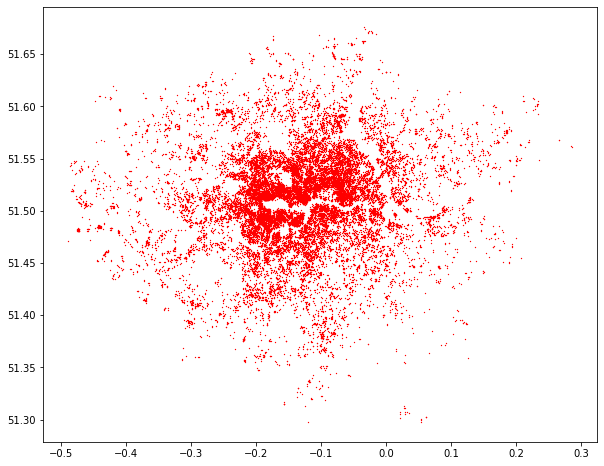

In [27]:
# print the airbnb data in its original crs

print(gdf.geometry.crs)     # prints the crs
print(gdf.total_bounds)     # prints the x and y cooridnates of the edges of the map i.e. the bounding box 
gdf.plot(figsize=(12,8), marker='*', color='red', markersize=0.2)

epsg:27700
[505022.6942146  157075.60491012 558530.54297458 199332.91453931]


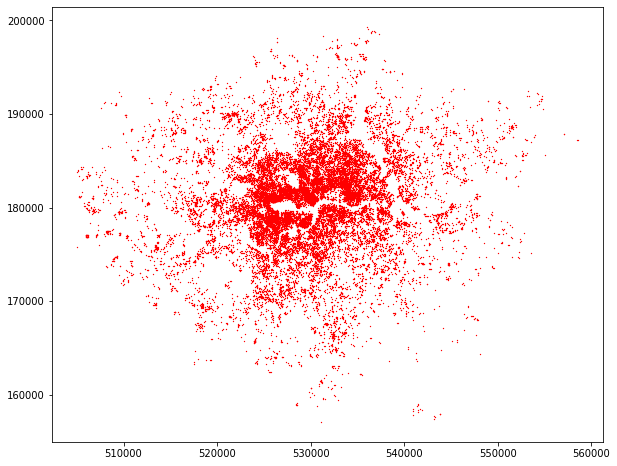

In [29]:
# print with new crs
gdf = gdf.to_crs("epsg:27700")      # change the crs
print(gdf.geometry.crs)             # print the crs
print(gdf.total_bounds)             # set the bounds
gdf.plot(figsize=(12,8), marker='*', color='red', markersize=0.2)     # print 

In [30]:
# find the range, mean, and median
print(f"The range of host_total_listings_count is {gdf.host_total_listings_count.min():,.2f} to {gdf.host_total_listings_count.max():,.2f}")      
print(f"The mean and median of the host_total_listings_count are {gdf.host_total_listings_count.mean():,.2f} and {gdf.host_total_listings_count.median():,.2f}")

The range of host_total_listings_count is 2.00 to 3,508.00
The mean and median of the host_total_listings_count are 105.99 and 4.00


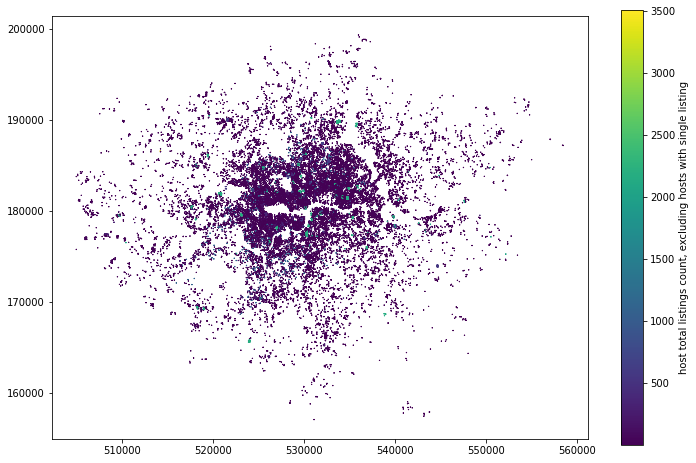

In [31]:
# plot 'host_total_listings_count' using a colour scheme viridis to show values of each point
gdf.plot(figsize=(12,8), marker='*', markersize=0.25,
         column='host_total_listings_count', cmap='viridis', 
         legend=True, legend_kwds={'label':'host total listings count, excluding hosts with single listing'})

In [ ]:
# wow thats a lot of listings that have a host with other listings!

(168954.0, 188175.0)

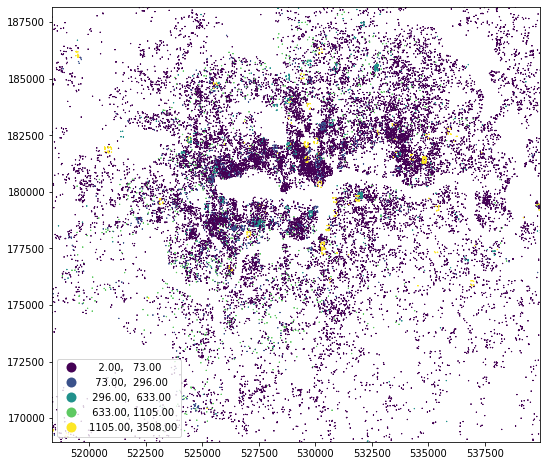

In [32]:
# use fisher_jenks which optimises classes
# set northign and easting values so that we view central london, where there is very significant number of listings
ax = gdf.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='host_total_listings_count', cmap='viridis', scheme='fisher_jenks', k=5, 
         legend=True)
ax.set_xlim([518369,539946])
ax.set_ylim([168954,188175])


In [ ]:
# its quite hard to see vairation at the lower range

(168954.0, 188175.0)

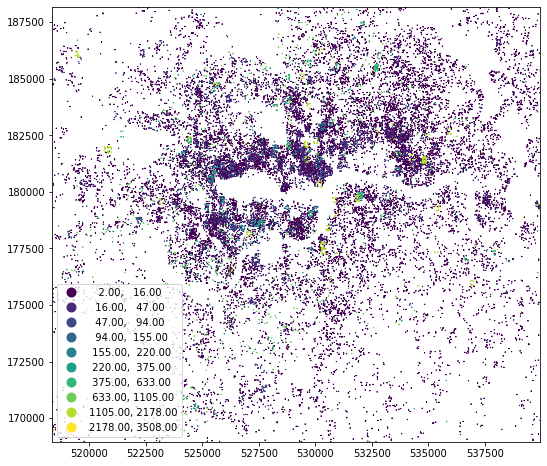

In [33]:
# try with a higher k value to make changes in the lower range more distinctive
ax = gdf.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='host_total_listings_count', cmap='viridis', scheme='fisher_jenks', k=10, 
         legend=True)
ax.set_xlim([518369,539946])
ax.set_ylim([168954,188175])

In [ ]:
# doesnt make it much clearer

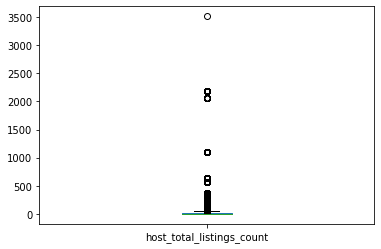

In [34]:
# perhaps undestanding the spread of the dat better will help us make a clearer map
# box plot to see spread of data

gdf.host_total_listings_count.plot.box()  

In [ ]:
# its hard to make out the lower ranges. Most values look to be below 500

In [35]:
# perhaps a histogram will be clearer
# find how many unique host_total_listings_count values there are to help us decide the number of bins for a histogram
print(gdf.host_total_listings_count.nunique())

100


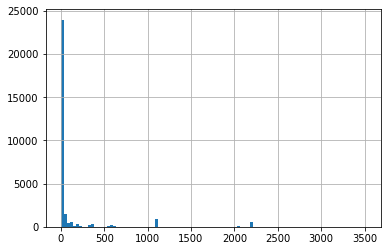

In [36]:
# create histogram
hist = gdf.host_total_listings_count.hist(bins=100)

In [37]:
# create a datafram of the values less than 500 fo a clearer look at lower values
gdflessthan500 = gdf[gdf.host_total_listings_count <= 500]

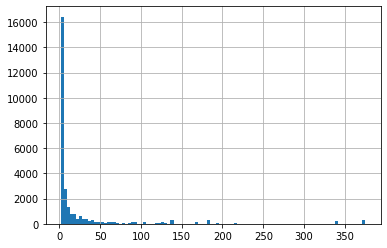

In [38]:
# create histogram of values below 500
hist = gdflessthan500.host_total_listings_count.hist(bins=100)

In [39]:
# create a datafram of the values less than 20
gdflessthan20 = gdf[gdf.host_total_listings_count <= 20]

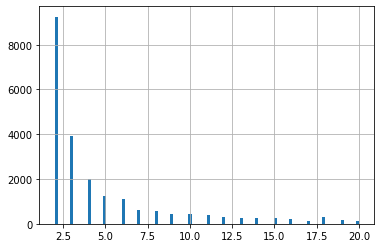

In [40]:
# create histogram of values below 20
st = gdflessthan20.host_total_listings_count.hist(bins=100)

In [41]:
def plot_points(ranges):
  ax = ranges.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='host_total_listings_count', cmap='viridis', scheme='fisher_jenks', k=5,
         legend=True)
  ax.set_xlim([525000,535000])
  ax.set_ylim([178000,185000])

for ranges in [gdflessthan20,gdfgreaterthan20,gdfgreaterthan100]:
  ranges.plot_points()

NameError: ignored

(168954.0, 188175.0)

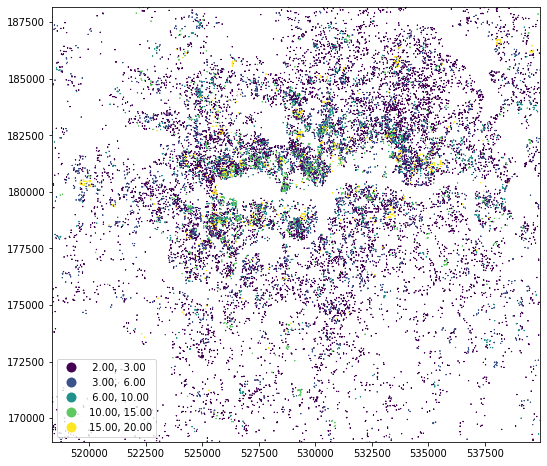

In [42]:
# plot points with a host_total_listings_count value of less than 20 to investigate
ax = gdflessthan20.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='host_total_listings_count', cmap='viridis', scheme='fisher_jenks', k=5,
         legend=True)
ax.set_xlim([518369,539946])
ax.set_ylim([168954,188175])

In [44]:
# find the host_total_listings_count values that are between 20 and 100
gdfgreaterthan20 = gdf[gdf.host_total_listings_count >= 20]
gdfbetween20and100 = gdfgreaterthan20[gdfgreaterthan20.host_total_listings_count <= 100]

(168954.0, 188175.0)

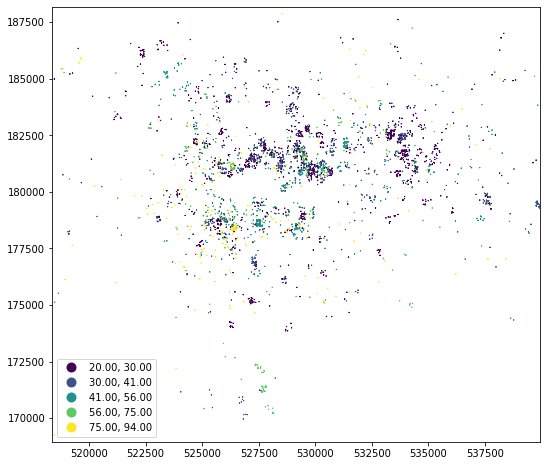

In [45]:
# plot these values
ax = gdfbetween20and100.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='host_total_listings_count', cmap='viridis', scheme='fisher_jenks', k=5, 
         legend=True)
ax.set_xlim([518369,539946])
ax.set_ylim([168954,188175])

In [46]:
# find the host_total_listings_count values that are greater than 100
gdfgreaterthan100 = gdf[gdf.host_total_listings_count >= 100]

(168954.0, 188175.0)

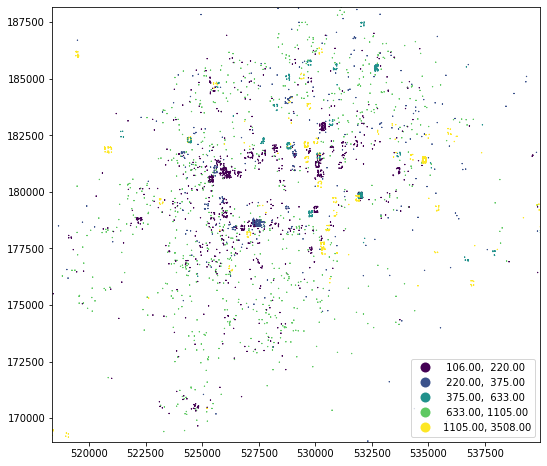

In [48]:
# plot these values
ax = gdfgreaterthan100.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='host_total_listings_count', cmap='viridis', scheme='fisher_jenks', k=5, 
         legend=True)
ax.set_xlim([518369,539946])
ax.set_ylim([168954,188175])


In [45]:
def plot_on_map(ranges):
  q = mc.Quantiles(gdflessthan20.host_total_listings_count.values, k=5) # For Fisher Jenks you may want 'Sampled' to speed things up

  f,ax = plt.subplots(figsize=(15,9))     # two values outputted, one is for f, one is for ax (the axis of the graph)
  water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
  green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14), ax=ax)
  gdflessthan20.plot(column='host_total_listings_count', scheme='Quantiles', k=5, 
         cmap='viridis', legend=True, marker='*', markersize=0.5, ax=ax)
  boros.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=2.5, ax=ax)

  ax.set_xlim([525000,540000])
  ax.set_ylim([176000,186000])
  ax.axis('off') #don't plot the axes (bounding box)
  ax.set_title('London Airbnb Listings Listed By Hosts With Multiple Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
  a = ax.annotate('Source: InsideAirbnb (2020)',
              xy=(0.905, 0.055), xycoords='figure fraction', 
               horizontalalignment='right', verticalalignment='bottom', 
               fontsize=12, fontweight=4, color='#555555')  #add source info on the image itself
  a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
  ax.get_legend().set_title("Number of Listings of Host")  #set the legend title

  legendgram(f, ax, 
              gdflessthan20.host_total_listings_count, q.bins, bins=round(gdflessthan20.host_total_listings_count.max()/25),
              pal=palmpl.Viridis_5,
              legend_size=(0.3, 0.1), 
              loc='lower left',
              clip=(0,750),
              frameon=True
      )

  f.savefig('ppn.png', dpi=150)

for ranges in [gdflessthan20,gdfgreaterthan20,gdfgreaterthan100]:
  ranges.plot_on_map()


AttributeError: ignored

TypeError: ignored

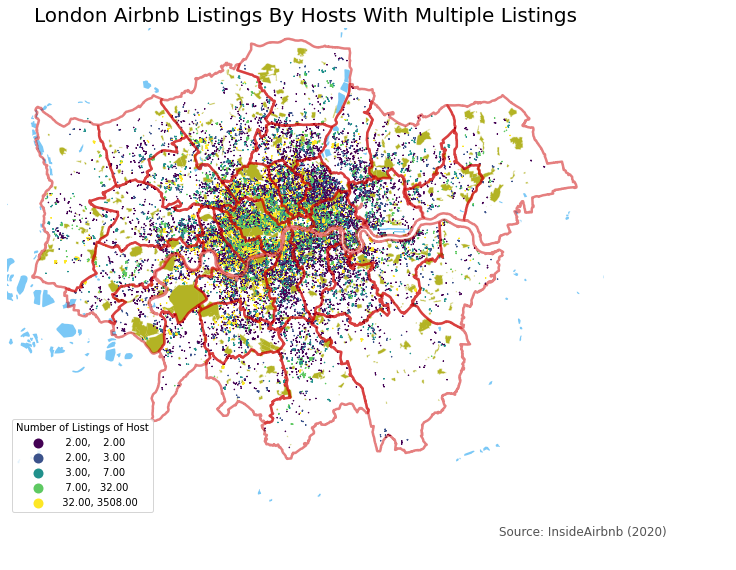

In [54]:
# plot all the multi listing values with the boroughs, water, and green space, choosing colours, qualities etc for each


q = mc.Quantiles(gdf.host_total_listings_count.values, k=5)

f,ax = plt.subplots(figsize=(15,9))     # two values outputted, one is for f, one is for ax (the axis of the graph)
water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14), ax=ax)
gdf.plot(column='host_total_listings_count', scheme='Quantiles', k=5, 
         cmap='viridis', legend=True, marker='*', markersize=0.5, ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=2.5, ax=ax)

ax.set_xlim([500864,564931])
ax.set_ylim([149562,202073])
ax.axis('off') 
ax.set_title('London Airbnb Listings By Hosts With Multiple Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: InsideAirbnb (2020)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555') 
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Number of Listings of Host") 

# for the legend:
legendgram(f, ax, 
            gdf.host_total_listings_count, q.bins, bins=round(gdf.host_total_listings_count.max()/25),
            pal=palmpl.Viridis_5,
            legend_size=(0.3, 0.1), 
            loc='lower left',
            clip=(0,750),
            frameon=True
    )

f.savefig('ppn.png', dpi=150)

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


TypeError: ignored

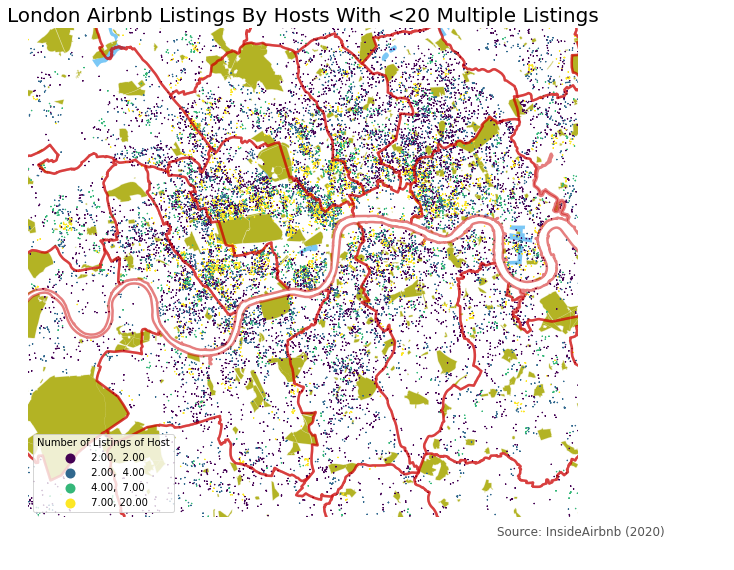

In [51]:
# plot the 'less than 20 values' with the boroughs, water, and green space, choosing colours, qualities etc for each

q = mc.Quantiles(gdflessthan20.host_total_listings_count.values, k=5)

f,ax = plt.subplots(figsize=(15,9))
water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14), ax=ax)
gdflessthan20.plot(column='host_total_listings_count', scheme='Quantiles', k=5, 
         cmap='viridis', legend=True, marker='*', markersize=0.5, ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=2.5, ax=ax)


ax.set_xlim([518369,539946])    # set to focus on central london where most values are
ax.set_ylim([168954,188175])  # set to focus on central london where most values are
ax.axis('off') 
ax.set_title('London Airbnb Listings By Hosts With <20 Multiple Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: InsideAirbnb (2020)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555') 
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Number of Listings of Host") 

legendgram(f, ax, 
            gdflessthan20.host_total_listings_count, q.bins, bins=round(gdflessthan20.host_total_listings_count.max()/25),
            pal=palmpl.Viridis_5,
            legend_size=(0.3, 0.1), 
            loc='lower left',
            clip=(0,750),
            frameon=True
    )

f.savefig('ppn.png', dpi=150)

TypeError: ignored

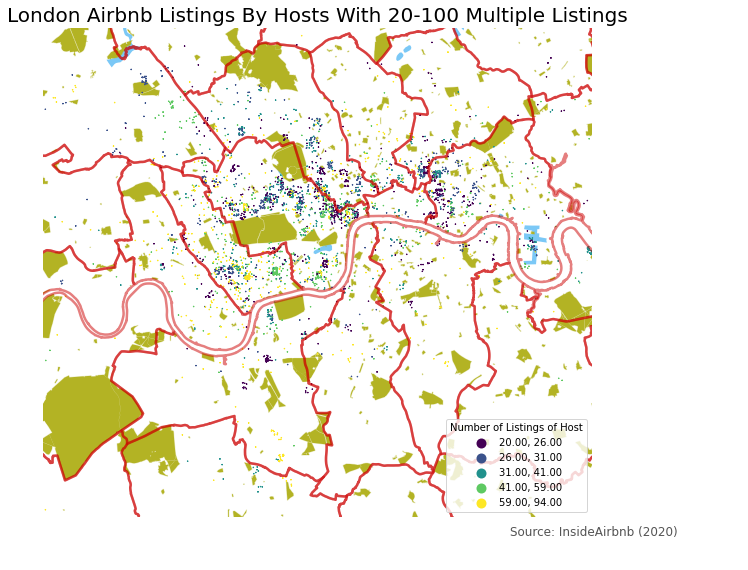

In [52]:
q = mc.Quantiles(gdfbetween20and100.host_total_listings_count.values, k=5) 

f,ax = plt.subplots(figsize=(15,9))
water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14), ax=ax)
gdfbetween20and100.plot(column='host_total_listings_count', scheme='Quantiles', k=5, 
         cmap='viridis', legend=True, marker='*', markersize=0.5, ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=2.5, ax=ax)

ax.set_xlim([518369,539946])   # set to focus on central london where most values are
ax.set_ylim([168954,188175])   # set to focus on central london where most values are
ax.axis('off') 
ax.set_title('London Airbnb Listings By Hosts With 20-100 Multiple Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: InsideAirbnb (2020)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555')  
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Number of Listings of Host")

legendgram(f, ax, 
            gdfbetween20and100.host_total_listings_count, q.bins, bins=round(gdfbetween20and100.host_total_listings_count.max()/25),
            pal=palmpl.Viridis_5,
            legend_size=(0.3, 0.1), 
            loc='lower left',
            clip=(0,750),
            frameon=True
    )

f.savefig('ppn.png', dpi=150)

TypeError: ignored

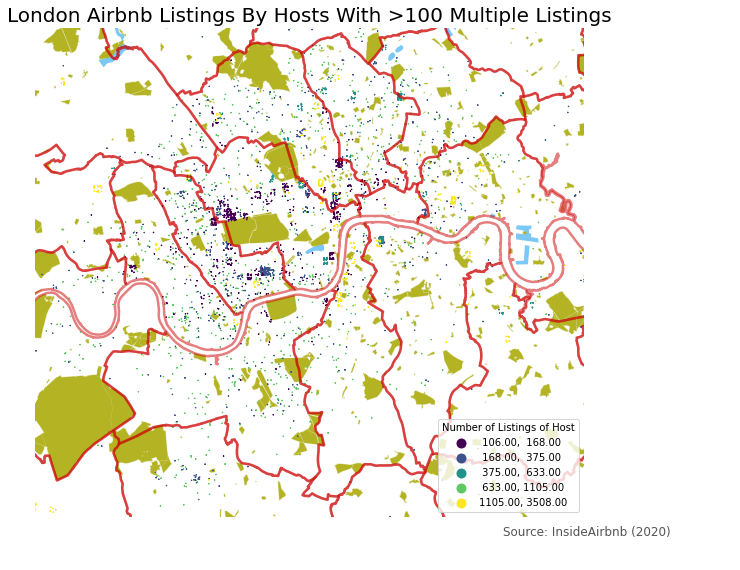

In [53]:
q = mc.Quantiles(gdfgreaterthan100.host_total_listings_count.values, k=5) 

f,ax = plt.subplots(figsize=(15,9))     # two values outputted, one is for f, one is for ax (the axis of the graph)
water.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
green.plot(edgecolor=(0.7, 0.7, 0.14, 0.25), facecolor=(0.7, 0.7, 0.14), ax=ax)
gdfgreaterthan100.plot(column='host_total_listings_count', scheme='Quantiles', k=5, 
         cmap='viridis', legend=True, marker='*', markersize=0.5, ax=ax)
boros.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=2.5, ax=ax)

ax.set_xlim([518369,539946])
ax.set_ylim([168954,188175])
ax.axis('off') 
ax.set_title('London Airbnb Listings By Hosts With >100 Multiple Listings', fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
a = ax.annotate('Source: InsideAirbnb (2020)',
             xy=(0.905, 0.055), xycoords='figure fraction', 
             horizontalalignment='right', verticalalignment='bottom', 
             fontsize=12, fontweight=4, color='#555555')
a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
ax.get_legend().set_title("Number of Listings of Host")  #set the legend title

legendgram(f, ax, 
            gdfgreaterthan100.host_total_listings_count, q.bins, bins=round(gdfgreaterthan100.host_total_listings_count.max()/25),
            pal=palmpl.Viridis_5,
            legend_size=(0.3, 0.1), 
            loc='lower left',
            clip=(0,750),
            frameon=True
    )

f.savefig('ppn.png', dpi=150)